<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/opencv10a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In order to obtain an accurate edge map, you’ll need to tune the cv2.Canny  edge detection parameters, specifically the lower and upper thresholds by hand. If the image you are working with comes from semi-controlled lighting conditions, then you’ll likely be able to find a set of edge detection parameters that work well across the dataset.

However, for “natural” images with no restrictions on lighting conditions, it can become very challenging to define a set of parameters that obtains decent accuracy.

Because of this, you might want to try applying the automatic Canny edge detector:

In [17]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [5]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)

	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)

	# return the edged image
	return edged

In [8]:
images = ["image_0003.jpg","image_0023.jpg", "image_0030.jpg"]

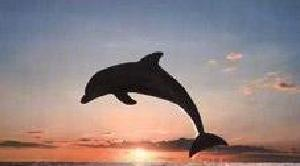

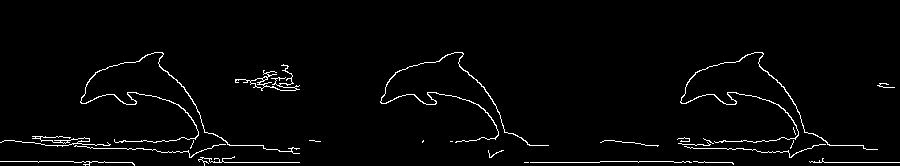

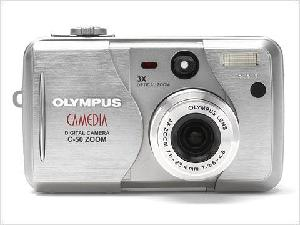

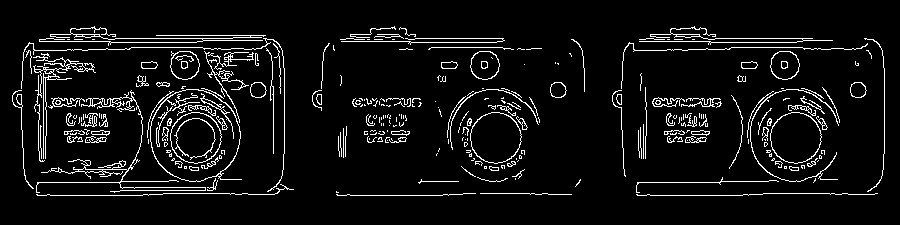

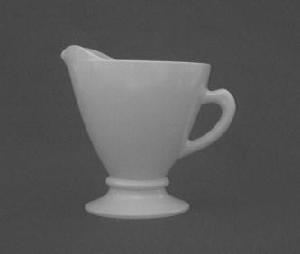

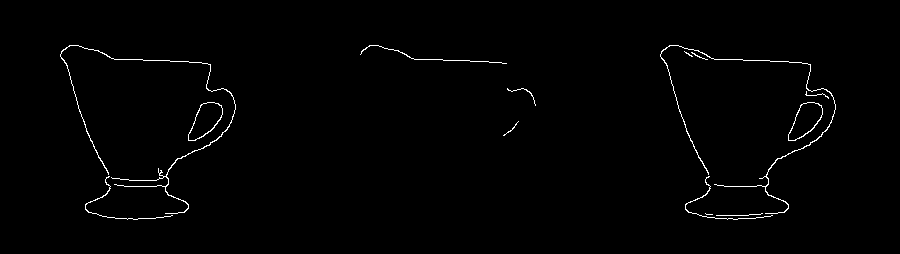

In [19]:
# loop over the images
for image in images:
	# load the image, convert it to grayscale, and blur it slightly
	image = cv2.imread(image)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	blurred = cv2.GaussianBlur(gray, (3, 3), 0)

	# apply Canny edge detection using a wide threshold, tight
	# threshold, and automatically determined threshold
	wide = cv2.Canny(blurred, 10, 200)
	tight = cv2.Canny(blurred, 225, 250)
	auto = auto_canny(blurred)

	# show the images
	cv2_imshow(image)
	cv2_imshow(np.hstack([wide, tight, auto]))

